In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train.csv")

# **3 EDA**

1. Exploring the data
    * Study each attribute and its characteristics
        * Name 
        * Type ( categorical ,int/float ,bounded /unbounded,text, structured ,etc.
        * % of missing values
        * Noisiness and type of noise ( stocchastic ,outliers,rounding errors,etc.)
        * Possibly useful for the task?
        * type of distirbution (Guassian ,uniform,logarithmic ,etc.)
    * Visualize the data.
    * Study the correlarions between attributes.
    * study how you would solve the problem manually.
    * Identify the promising transformation you may want to apply.
    * identify extra data that would be useful.
    * Document what you have learned.
    
    
    2. Prepare the data
        + Data cleaning/Refining
             - Univariate Analysis
        + Understanding feature importance
             - Bivariate Analysis(using statistical methodologies) 

In [4]:
from sklearn.model_selection import ShuffleSplit
shufflesplit = ShuffleSplit(n_splits =1 ,test_size =0.2 ,random_state =42)
for train_index, test_index in shufflesplit.split(df):
  df_train_set2 = df.loc[train_index]
  df_test_set2 = df.loc[test_index]


In [1]:
df_train_set2.SaleCondition.value_counts()

NameError: name 'df_train_set2' is not defined

In [5]:
def  mapSaleConditionToBinary(val):
    if (val == "Normal"):
      return 1
    else :
      return 0

In [6]:
df_train_set2["SaleCondition_binary"] = \
     df_train_set2["SaleCondition"].apply(lambda x : mapSaleConditionToBinary(x))

In [7]:
df_train_set2.SaleCondition_binary.value_counts()

1    964
0    204
Name: SaleCondition_binary, dtype: int64

## Categorical to Categorical bar chart

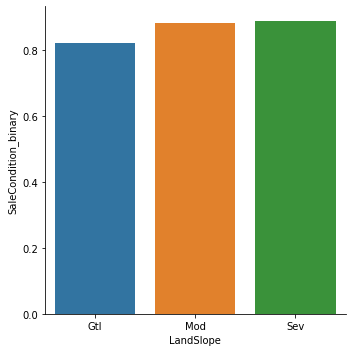

In [8]:
sns.factorplot(data=df_train_set2 ,x='LandSlope',y="SaleCondition_binary",kind="bar",ci=None)

## Categorical to Quantitative variable

#### 1 MSSubClass (type of dwelling) has any effect on SalePrice

####   SalePrice = ** Quantitative ** = Response varible
####   MSSubClass = ** Categorical ** = Explanatory varible

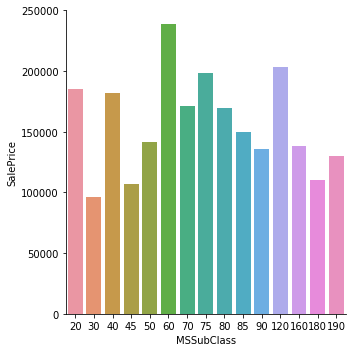

In [9]:
sns.factorplot(data=df_train_set2 ,x="MSSubClass",y="SalePrice",ci=None,kind="bar")

In [10]:
# from this graph we can see that for different category of MSSubClass ,SalePrice is different 
# so we can conclude that there is a relationship b/w MSSubclass and SalePrice

#### MSSubClass - 60 has the maximum average SalePrice.
#### The number of X - axis are not clear ,lets map them the actual description 

In [11]:
mssub_class_dict = {
    
        20 :"1-STORY 1946 & NEWER ALL STYLES"
        ,30:"1-STORY 1945 & OLDER"
        ,40:"1-STORY W/FINISHED ATTIC ALL AGES"
        ,45:"1-1/2 STORY - UNFINISHED ALL AGES"
        ,50:"1-1/2 STORY FINISHED ALL AGES"
        ,60:"2-STORY 1946 & NEWER"
        ,70:"2-STORY 1945 & OLDER"
        ,75:"2-1/2 STORY ALL AGES"
        ,80:"SPLIT OR MULTI-LEVEL"
        ,85:"SPLIT FOYER"
        ,90:"DUPLEX - ALL STYLES AND AGES"
       ,120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER"
       ,150:"1-1/2 STORY PUD - ALL AGES"
       ,160:"2-STORY PUD - 1946 & NEWER"
       ,180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER"
       ,190:"2 FAMILY CONVERSION - ALL STYLES AND AGES" 
}

In [12]:
df_train_set2["MSSubClass_mapped"] = df_train_set2["MSSubClass"].map(mssub_class_dict)

In [13]:
df_train_set2["MSSubClass_mapped"].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          434
2-STORY 1946 & NEWER                                     240
1-1/2 STORY FINISHED ALL AGES                            113
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     64
2-STORY 1945 & OLDER                                      52
1-STORY 1945 & OLDER                                      50
2-STORY PUD - 1946 & NEWER                                49
SPLIT OR MULTI-LEVEL                                      45
DUPLEX - ALL STYLES AND AGES                              41
2 FAMILY CONVERSION - ALL STYLES AND AGES                 28
SPLIT FOYER                                               17
2-1/2 STORY ALL AGES                                      15
1-1/2 STORY - UNFINISHED ALL AGES                         10
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                    7
1-STORY W/FINISHED ATTIC ALL AGES                          3
Name: MSSubClass_mapped, dtype: int64

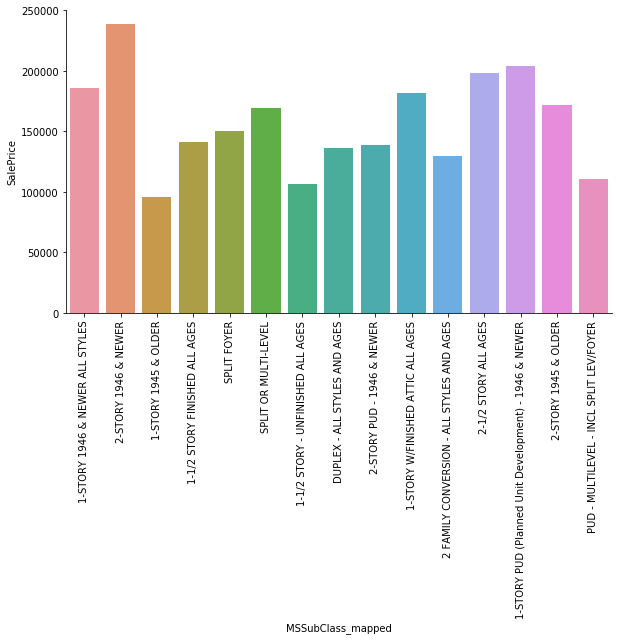

In [14]:
gr = sns.catplot(data=df_train_set2 ,x="MSSubClass_mapped",y="SalePrice",ci=None,kind="bar",aspect=2)
gr.set_xticklabels(rotation =90)

## Statistical Analysis 

### ANOVA F- Test for bi-variate categorical and quantitative

In [15]:
import statsmodels.formula.api as smf
df1 = df_train_set2[["CentralAir","SalePrice"]].dropna()
df1.shape

(1168, 2)

In [16]:
df1["CentralAir"].value_counts()

Y    1085
N      83
Name: CentralAir, dtype: int64

In [17]:
df1.groupby("CentralAir").mean()

,SalePrice
CentralAir,
N,106762.445783
Y,187154.320737


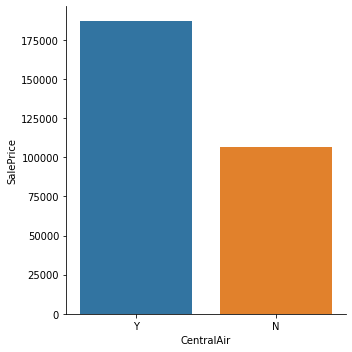

In [18]:
sns.factorplot(data=df1,x="CentralAir",y="SalePrice",ci=None,kind="bar")

In [19]:
ols = smf.ols(formula="SalePrice ~ C(CentralAir)",data =df1).fit()
ols.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000020FF8BC48C8>>

In [20]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     89.83
Date:                Wed, 22 Jan 2020   Prob (F-statistic):           1.40e-20
Time:                        00:56:50   Log-Likelihood:                -14759.
No. Observations:                1168   AIC:                         2.952e+04
Df Residuals:                    1166   BIC:                         2.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.068e+05   8175.355     13.059      0.000    9.07e+04    1.23e+05
C(CentralAir)[T.Y]  8.039e+04   8482.292      9.478      0.000    6.37e+04     9.7e+04
==============================================================================
Omnibus:                      477.592   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2456.866
Skew:                           1.849   Prob(JB):                         0.00
Kurtosis:                       9.066   Cond. No.                         7.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Chi - Square of independence

In [21]:
df3 = df_train_set2[["BsmtQual","OverallQual"]].dropna()
df3["BsmtQual"] = pd.Categorical(df3["BsmtQual"])
df3.keys()

Index(['BsmtQual', 'OverallQual'], dtype='object')

In [22]:
df3["BsmtQual"].value_counts()

TA    521
Gd    493
Ex     97
Fa     29
Name: BsmtQual, dtype: int64

In [23]:
df3["BsmtQual"].head()

254     TA
1066    Gd
638     Fa
799     Gd
380     TA
Name: BsmtQual, dtype: category
Categories (4, object): [Ex, Fa, Gd, TA]

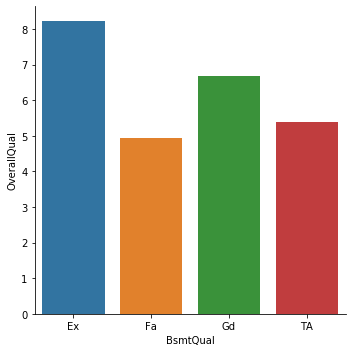

In [24]:
sns.catplot(data=df3,x="BsmtQual",y="OverallQual",ci=None,kind="bar")

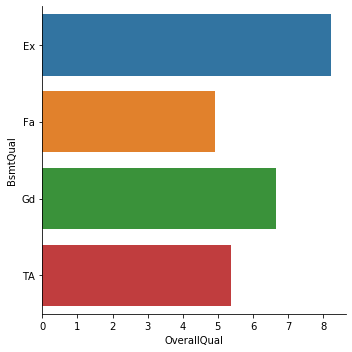

In [25]:
sns.catplot(data=df3,y="BsmtQual",x="OverallQual",ci=None,kind="bar")

In [34]:
df2 = df_train_set2[["BsmtQual","CentralAir"]].dropna()
cross_tab2 = pd.crosstab(df2.CentralAir,df2.BsmtQual,margins=True)
cross_tab2

BsmtQual,Ex,Fa,Gd,TA,All
CentralAir,,,,,
N,0,8,9,53,70
Y,97,21,484,468,1070
All,97,29,493,521,1140


In [37]:
c2table2 = stats.chi2_contingency(cross_tab2)
c2table2

(60.113108058664906,
 4.4288464279767715e-10,
 8,
 array([[   5.95614035,    1.78070175,   30.27192982,   31.99122807,
           70.        ],
        [  91.04385965,   27.21929825,  462.72807018,  489.00877193,
         1070.        ],
        [  97.        ,   29.        ,  493.        ,  521.        ,
         1140.        ]]))

### How to calculate expected value

In [26]:
cross_tab = pd.crosstab(df3.BsmtQual,df3.OverallQual,margins=True)

In [27]:
cross_tab

OverallQual,1,2,3,4,5,6,7,8,9,10,All
BsmtQual,,,,,,,,,,,
Ex,0,0,0,0,2,6,14,32,32,11,97
Fa,1,0,2,6,10,8,2,0,0,0,29
Gd,0,0,0,13,46,136,198,96,4,0,493
TA,0,1,9,59,239,161,43,7,0,2,521
All,1,1,11,78,297,311,257,135,36,13,1140


If the probability of event A and event B are independent , P(A and B) = P(A) . P(B)

This is the situation when null hypothesis is true (i.e. No relation b/w A and B) .Hence we can use the formula

P( BsmtQual = "EX" and OverallQual = "9" )   = P( BsmtQual = "EX" ) * P( OverAllQual = "9")
p( BsmtQual = "EX")   = 97/ 1140
P( OverAllQual = "9") = 36/1140

P( BsmtQual = "EX" and OverallQual = "9" ) = (97*36) / (1140*1140)

Expected value for all 608 records is = (1140 * 97 * 36 ) / (1140 *1140)
                                      = (row total) (column total) / total records
                                      = 3.06
                                      
### Above is the manually calculation to find the cross tabular values
### We can use direct formula to calculate all this

#### Q.What is a Contingency table ?
#### A.A table showing the distribution of one variable in rows and another in columns, used to study the correlation between the two variables.

In [31]:
import scipy.stats as stats

c2table = stats.chi2_contingency(cross_tab)
c2table
# SciPy’s chi2_contingency() returns four values, 𝜒2 value, p-value, degree of freedom and expected values

NameError: name 'cross_tab' is not defined

In [29]:
# from the above table we can see that the manually calculated value for "BsmtQual" "OverallQual" is same as the value
# calculated by formula

## FACETGRID

#### factegrid has 2 function with it
####    1)    map(sns.distplot,numeric column)

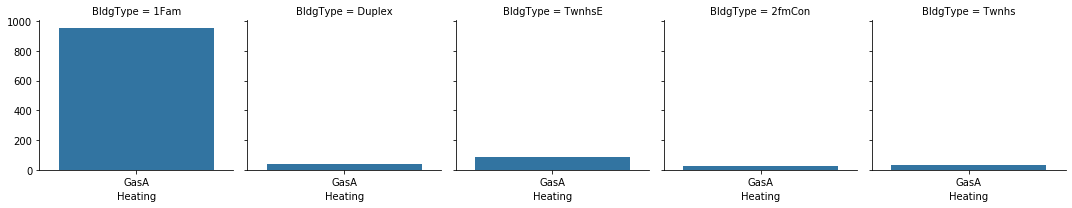

In [7]:
# FacetGrid will create graph for each category present in the specified categorical columm
g = sns.FacetGrid(data=df_train_set2,col ="BldgType")

g.map(sns.countplot,"Heating")

In [26]:
temp_bh = df_train_set2[['BldgType','Heating']].dropna()
pd.crosstab(temp_bh.BldgType,temp_bh.Heating,margins=True)

Heating,Floor,GasA,GasW,Grav,OthW,Wall,All
BldgType,,,,,,,
1Fam,1,957,12,5,2,1,978
2fmCon,0,25,3,1,0,0,29
Duplex,0,38,0,0,0,3,41
Twnhs,0,32,0,0,0,0,32
TwnhsE,0,88,0,0,0,0,88
All,1,1140,15,6,2,4,1168


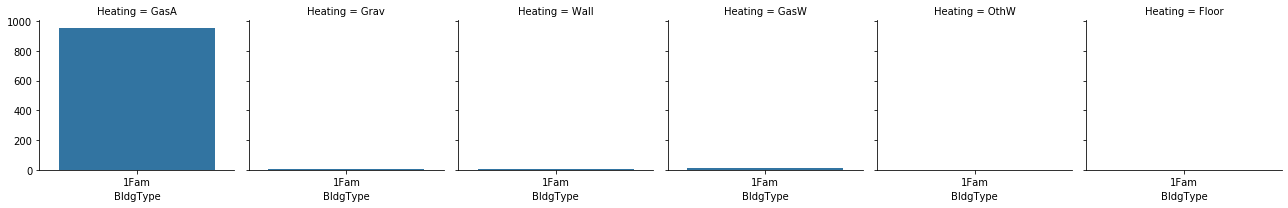

In [28]:
# FacetGrid will create graph for each category present in the specified categorical columm
g = sns.FacetGrid(data=df_train_set2,col ="Heating")

g.map(sns.countplot,"BldgType")

In [22]:
tips = sns.load_dataset("tips")

tips.head()
tips.size

1708

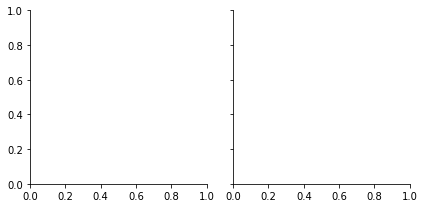

In [17]:
sns.FacetGrid(data=tips,col="smoker")
# it will make 2 graph smoker - Y and N

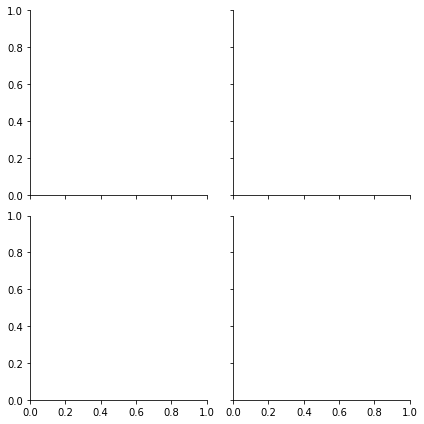

In [20]:
sns.FacetGrid(data=tips,col="time",row='sex')
# it will make 4 graph smoker = Y/N
#                      sex    = male/female

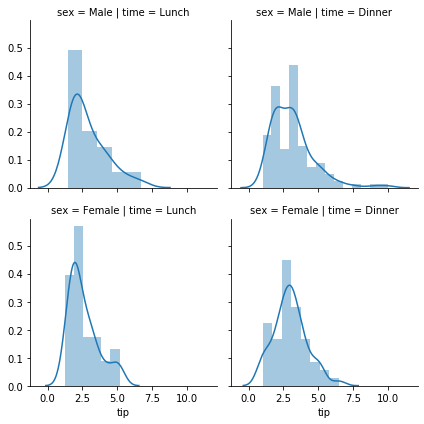

In [21]:
g = sns.FacetGrid(data=tips,col="time",row='sex')
g.map(sns.distplot,"tip")

### How to check distribution of data
       **Shapiro -Wilk Test **

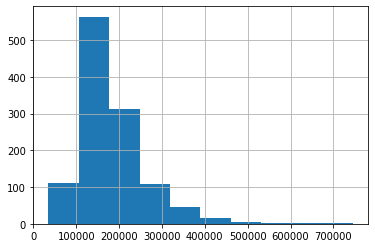

In [29]:
df_train_set2.SalePrice.hist()

In [34]:
import scipy.stats as stats

stats.shapiro(np.log(df_train_set2.SalePrice))  # take
#     result (xxxx , p - value) reject the null hypothesis
# sample is not taken from nomally distributed population

(0.9924730658531189, 1.1478463420644403e-05)

In [6]:
df_train_set2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train_set2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000


In [24]:
denom = df_train_set2.LotFrontage.max() - df_train_set2.LotFrontage.min()
denom

292.0

In [19]:
from sklearn.preprocessing import MinMaxScaler


In [20]:
scaling = MinMaxScaler()

In [21]:
scaling.fit_transform(df_train_set2[["LotFrontage","LotArea"]])

array([[0.16780822, 0.0331861 ],
       [0.13013699, 0.03055458],
       [0.15753425, 0.03494823],
       ...,
       [0.13356164, 0.0321204 ],
       [0.11643836, 0.02964313],
       [0.10958904, 0.01114305]])